<a href="https://colab.research.google.com/github/lata-11/Image-processing-assignments/blob/main/Histogram_equalization_result_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np


In [47]:
def apply_histogram_equalization(img, iterations=1):
  """Applies histogram equalization on an image with saturation check.

  Args:
      img: The input image as a NumPy array (grayscale).
      iterations: The number of equalization iterations (default: 1).

  Returns:
      A list containing the equalized images for each iteration.
  """
  equalized_images = []
  for _ in range(iterations):
    # Apply histogram equalization
    equ = cv2.equalizeHist(img)

    # Check for saturation (all pixel values become 0 or 255)
    if np.all(np.logical_or(equ == 0, equ == 255)):
      print("Image saturated after iteration", len(equalized_images))
      break

    equalized_images.append(equ)
  return equalized_images

In [48]:
def plot_histogram_distribution(original_img, equalized_img):
  """Plots the histogram and intensity distribution of original and equalized images.

  Args:
      original_img: The original image as a NumPy array.
      equalized_img: The equalized image as a NumPy array.
  """
  plt.figure(figsize=(12, 6))

  # Plot histogram
  plt.subplot(121)
  plt.hist(original_img.ravel(), bins=256, range=(0, 256), color='b', alpha=0.7, label='Original')
  plt.hist(equalized_img.ravel(), bins=256, range=(0, 256), color='g', alpha=0.7, label='Equalized')
  plt.legend()
  plt.title('Histogram')
  plt.xlabel('Intensity')
  plt.ylabel('Number of Pixels')

  # Plot intensity distribution
  plt.subplot(122)
  plt.plot(original_img.ravel(), color='b', alpha=0.7, label='Original')
  plt.plot(equalized_img.ravel(), color='g', alpha=0.7, label='Equalized')
  plt.legend()
  plt.title('Intensity Distribution')
  plt.xlabel('Pixel Position')
  plt.ylabel('Intensity')

  plt.show()


Good contrast image


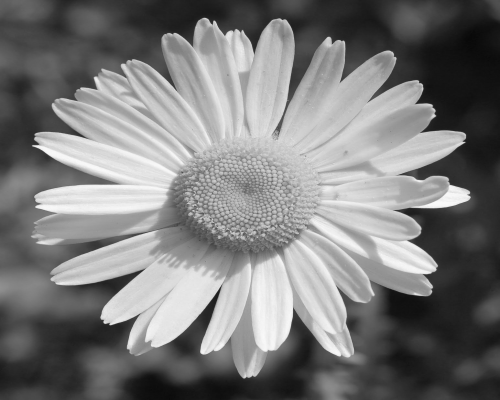

Poor contrast image


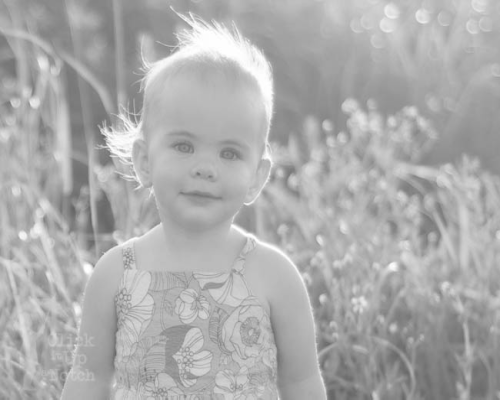

Equalized Image (Iteration 1)


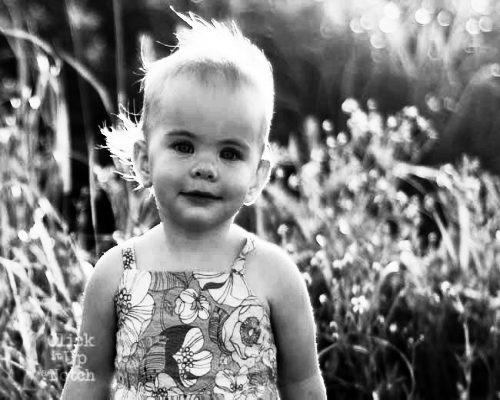

Equalized Image (Iteration 2)


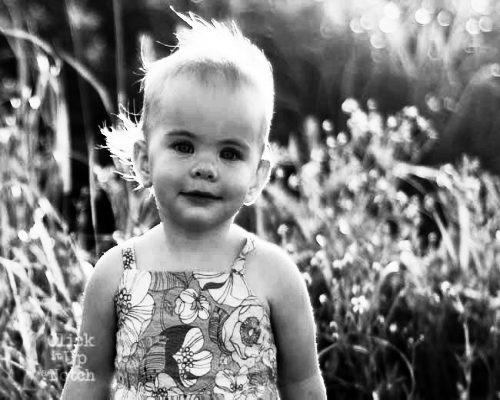

Equalized Image (Iteration 3)


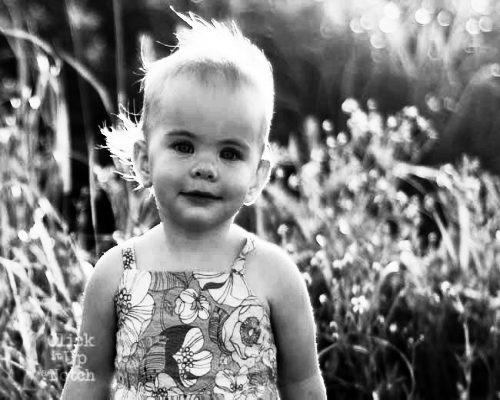

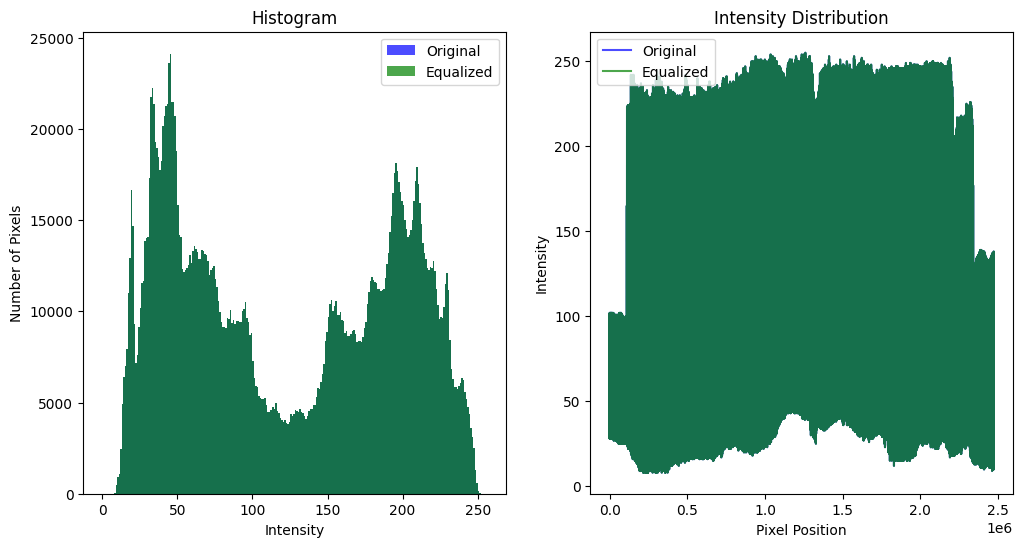

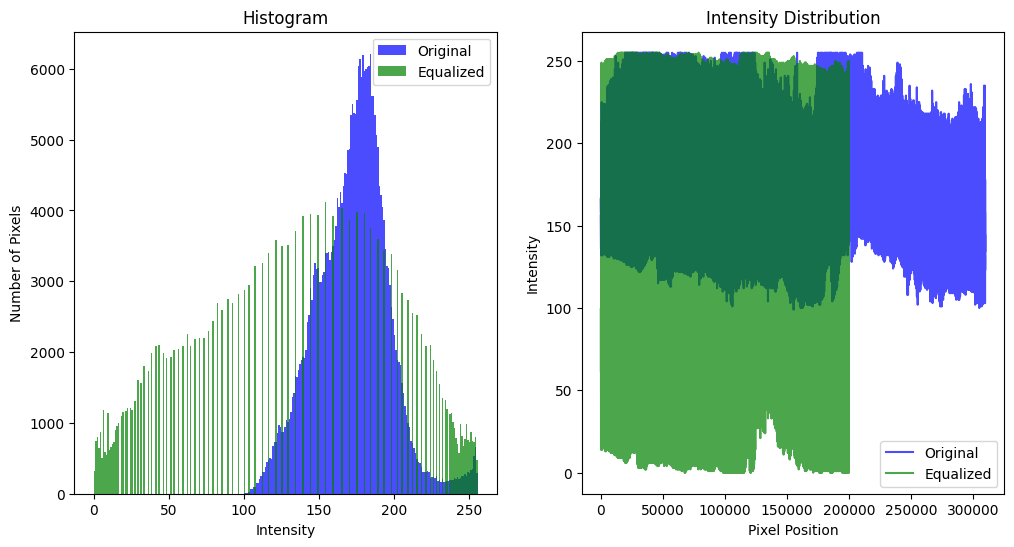

In [51]:
# Define image paths (replace with actual paths to your images)
image_path1 = '/content/white daisy.jpg'  # Image with good contrast
image_path2 = '/content/DSC_0058-4-2.jpg.crdownload'  # Image with poor contrast

# Read the images in grayscale
img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

#show both images
new_width = 500
new_height = 400
resized_img1 = cv2.resize(img1, (new_width, new_height), interpolation=cv2.INTER_AREA)
resized_img2 = cv2.resize(img2, (new_width, new_height), interpolation=cv2.INTER_AREA)
print("Good contrast image")
cv2_imshow(resized_img1)
print("Poor contrast image")
cv2_imshow(resized_img2)

# Histogram equalization (on image with poor contrast)
iterations = 3  # Adjust the number of iterations as desired
equalized_images2 = apply_histogram_equalization(resized_img2.copy(), iterations=iterations)

# Check if saturation occurred during equalization
if not equalized_images2:
  print("Image with poor contrast saturated in the first iteration!")


for i, img in enumerate(equalized_images2):
  print(f"Equalized Image (Iteration {i+1})")
  cv2_imshow(img)

# Plot histograms and distributions (uncomment for both images)
# Original vs. Equalized (Good Contrast)
plot_histogram_distribution(img1.copy(), img1.copy())  # No equalization for good contrast

# Original vs. Equalized (Poor Contrast, Iteration 1)
plot_histogram_distribution(img2.copy(), equalized_images2[0])